In [2]:
%load_ext autoreload
%autoreload 2

import os
head, tail = os.path.split(os.getcwd())
if tail == "notebooks": os.chdir(head)

SEED = 42
from scripts import plots, helpers as h

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import pandas as pd

X, y = h.load_data('data/processed/v1_var_desync0_clean.h5', subset="Profiling")

df_idx = pd.read_csv('data/processed/ttest_comb_idx.csv')
df_idx.drop(["Unnamed: 0"], axis=1, inplace=True)
df_idx.head()

,i,j,tstat
0,999,220,10.745490
1,1000,220,12.845836
2,1000,221,12.206614
3,1000,222,12.019820
4,1001,220,12.245995


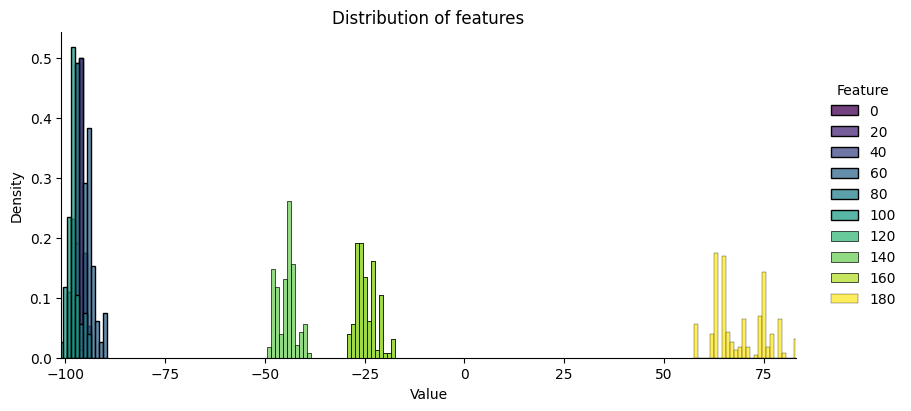

In [26]:
import numpy as np
X_comb = X.iloc[df_idx['i'], df_idx['j']]

ax = plots.features_hist(X_comb, idx=range(0, 200, 20), figsize=(9, 4))
ax.figure.savefig("figures/feature_hist.png", dpi=300)

In [65]:
df_inv = df_idx.copy()
df_inv[['i', 'j']] = df_inv[['j', 'i']]
df_stacked = pd.concat([df_idx, df_inv], axis=0)

poi_counts = df_stacked.drop('tstat', axis=1).groupby(['i']).count()
poi_counts_norm = poi_counts / poi_counts.max()
poi_counts_norm = poi_counts_norm.reset_index()
poi_counts_norm.head()

,i,j
0,60,0.03125
1,61,0.06250
2,62,0.15625
3,63,0.09375
4,64,0.09375


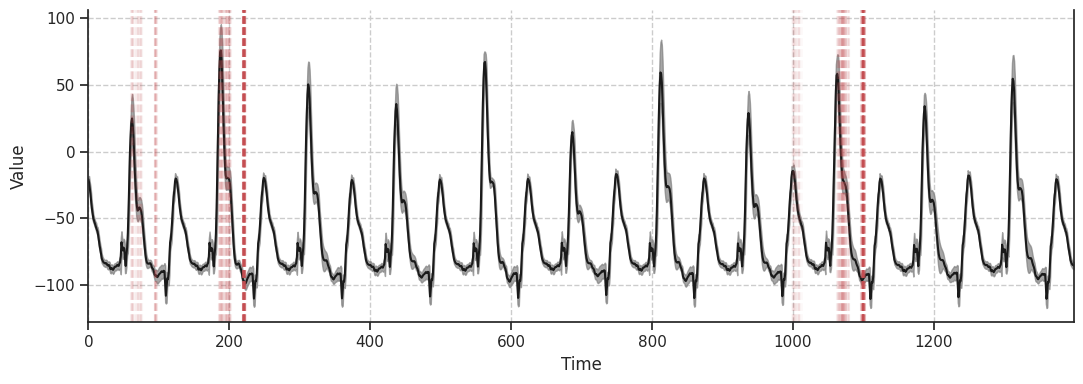

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='ticks')

fig, ax = plt.subplots(figsize=(11, 4))
m, sd = plots.mean_std(X)
sns.lineplot(m, ax=ax, color='k')

plots.std_band(ax, m, sd)
plots.lim(ax, len(m))
plots.labs(ax, xlab="Time", ylab="Value")
ax.grid(True, linestyle='--')

for idx in range(len(poi_counts_norm)):
    poi = poi_counts_norm.iloc[idx]
    ax.axvline(poi['i'], color='r', alpha=poi['j'], linestyle='--')

fig.tight_layout()
sns.despine(ax=ax, right=False)
# fig.savefig()